# Analiza najboljših knjig 

Med študijem na FMF me prešine grenko spoznanje: medtem ko trpim za skripto analize ali se mučim s pisanjem naloge za programiranje, moji nekdanji sošolci, sedaj študentje FDV-ja, posedajo po kavarnah (pre corona time) ali preprosto ne vedo, kaj bi s svojim časom. Tudi jaz si zaželim lagodnega življenja, zato se odločim, da postanem samooklicana umetnica, napišem eno ali dve uspešni knjigi in nato uživantsko živim od obilnih prihodkov. 

Ker ne želim izgubljati časa s pisanjem povprečnih del, ampak se že s svojim prvencem zavihteti na sam vrh, želim ugotoviti, kakšno delo moram ustvariti, da bo moja možnost za uspeh čim večja. Tako najdem spletno stran goodreads.com in se pri ustvarjanju vrhunske literature odločim slediti njeni lestvici .

In [549]:
import pandas as pd

Za začetek shranim podatke o knjigah, žanrih in nagradah v nove spremenljivke. Za indeksni stolpec pri vseh treh izberem "id_knjige". Ta je določen enolično, saj ga vsaka knjiga dobi glede na mesto na lestvici, mesta pa se ne ponavljajo.

Pri združevanju csv datotek se je vrstni red lestvice rahlo premešal, tako da moram podatke po uvozu spet posortirati. Sortiram po vrstnem redu dela na lestvici.

Opomba: Če želim sortirati po "score", je vseeno če sortiram po id_knjige, saj "score" določi mesto knjige na lestvici (knjiga z najvišjim se nahaja na prvem mestu).

In [550]:
knjige = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv', index_col='id_knjige').sort_values('id_knjige')

In [551]:
knjige.head(10)

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
4,Pride and Prejudice,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
6,The Book Thief,Markus Zusak,11466,False,It is 1939. Nazi Germany. The country is hol...,2006,Alfred A. Knopf,4.38,1407928,14526,1909675,115407,True
7,Animal Farm,George Orwell,3706,False,"A farm is taken over by its overworked, mist...",1996,Signet Classics,3.96,1300492,13508,2857118,58992,True
8,The Chronicles of Narnia,C.S. Lewis,1069006,True,"Journeys to the end of the world, fantastic cr...",2002,HarperCollins,4.26,1256688,13134,538495,10595,False
9,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,656983,True,"This four-volume, boxed set contains J.R.R. To...",2012,Ballantine Books,4.60,1185041,12366,113292,1832,False


In [552]:
zanri = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzeni_zanri.csv',index_col='id_knjige').sort_values('id_knjige')

In [553]:
zanri.head(10)

,zanr
id_knjige,
1,young-adult
1,fiction
1,dystopia
2,fantasy
2,young-adult
2,fiction
3,classics
3,fiction
3,historical-fiction


In [554]:
nagrade = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_nagrade.csv',index_col='id_knjige').sort_values('id_knjige')

In [555]:
nagrade.head(10)

,nagrada
id_knjige,
1,Locus Award Nominee for Best Young Adult Book
1,New Mexico Land of Enchantment Award for Young...
1,Eliot Rosewater Indiana High School Book Award
1,The Inky Awards for Silver Inky
1,California Young Readers Medal for Young Adult
1,Lincoln Award
1,Kinderboekwinkelprijs
1,Missouri Truman Readers Award
1,CYBILS Award for Young Adult Fantasy &amp; Sci...


# Kateri žanri so najbolj priljubljeni?

Za začetek želim ugotoviti, katerega žanra naj bo moje delo, zato poiščem najbolj priljubljene žanre na lestvici.<br>
Ker se lahko zgodi, da je začetnih nekaj sto knjig (najbolje ocenjene) večinoma enega žanra, večinski preostanek pa drugega, bom analizirala najbolj priljubljen žanr za prvih 100, 1000 in 5000 knjig. S tem želim preveriti tudi ali nek žanr prevladuje na celotni lestvici ali pa je prisoten zgolj na vrhu in se kasneje porazdeli z drugimi žanri.<br>
Ker pri vsaki knjigi zajamem po tri žanre, moram za prvih 100 knjig torej vzeti prvih 300 žanrov. Podobno za 1000 in 5000 knjig.

In [556]:
priljubljeni_zanri_100 = zanri.head(300).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [557]:
priljubljeni_zanri_100.head(10)

,st_zanrov
zanr,
fiction,91
classics,63
fantasy,25
young-adult,21
historical-fiction,18
romance,10
science-fiction,9
childrens,7
horror,6


Med prvimi stotimi knjigami sta torej najbolj priljubljena fikcija (fiction) in klasika (classics), sledijo fantastika (fantasy),literatura za mlade (young-adult, to je 12-18 let) in zgodovinska fikcija (historical-fiction).

Nato preverim ali se priljubljenost žanrov spremni, ko pogledam večje število del.

In [558]:
priljubljeni_zanri_1000 = zanri.head(3000).groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [559]:
priljubljeni_zanri_1000.head(10)

,st_zanrov
zanr,
fiction,694
classics,356
fantasy,275
young-adult,247
historical-fiction,148
romance,145
contemporary,97
science-fiction,76
non-fiction,67


In [560]:
priljubljeni_zanri = zanri.groupby('zanr').size().to_frame('st_zanrov').sort_values('st_zanrov', ascending=False)

In [561]:
priljubljeni_zanri.head(10)

,st_zanrov
zanr,
fiction,2857
fantasy,1384
young-adult,1249
classics,866
romance,768
historical-fiction,565
contemporary,564
non-fiction,458
mystery,397


Fikcija torej kraljuje skozi celotno lestvico, zato se zdi precej varna izbira za moj žanr. Ker sta ji blizu tudi fantastika in literatura za mlade, bi bilo v žanr smiselno vključiti tudi zmes teh dveh. Klasiko bi bilo verjetno težko združiti s prvimi tremi žanri, zato pa bi lahko dodala še nekaj romantike in s te pokrila dobršen del celotne lestvice.

Ker bi bilo za svoje delo lepo prejeti tudi kakšno nagrado, želim preveriti, kako nagrajeni so posamezni žanri.
Za začetek preverim, kateri žanr na lestvici je prejel največ nagrad.

In [562]:
zanri_z_nagrado = pd.merge(zanri,nagrade,left_on='id_knjige',right_on='id_knjige').groupby('zanr').size().to_frame('st_nagrad').sort_values('st_nagrad',ascending=False)

In [563]:
zanri_z_nagrado.head(10)


,st_nagrad
zanr,
fiction,4868
young-adult,2709
fantasy,2233
historical-fiction,1278
contemporary,1025
romance,964
science-fiction,900
mystery,631
classics,622


Med desetimi najbolj priljubljenimi žanri in desetimi najbolj nagrajenimi žanri so torej le manjše razlike: nekateri žanri so pridobili oziroma izgubili nekaj mest na lestvici, med prvo deseterico lestvice najbolj nagrajenih pa se je na novo pojavila znanstvena fantastika.<br>
Po lestvici je glede na število nagrad najbolj nazadovala klasika, kar pa lahko pripišemo tudi dejstvu, da v današnjem času podeljujejo veliko več literarnih nagrad kot so jih v obdobju izida klasikov.

Ker je na lestvici veliko več fikcije kot npr. skandinavske literature, je logično, da bo tudi skupno število nagrad fikcije višje, kot skupno število nagrad skandinavske literature.<br>
Zato naredim tudi analizo povprečnega števila nagrad na knjigo v posameznem žanru.

In [564]:
zanri_nagrade = pd.merge(zanri_z_nagrado,priljubljeni_zanri,left_on='zanr',right_on='zanr')

In [565]:
zanri_nagrade['nagrada_na_knjigo'] = zanri_nagrade.st_nagrad / zanri_nagrade.st_zanrov

In [566]:
zanri_nagrade.sort_values('nagrada_na_knjigo')[::-1].head(20)

,st_nagrad,st_zanrov,nagrada_na_knjigo
zanr,,,
scandinavian-literature,16,2,8.000000
new-york,6,1,6.000000
realistic-fiction,121,23,5.260870
dutch-literature,5,1,5.000000
south-africa,5,1,5.000000
cyberpunk,37,8,4.625000
alternate-history,13,3,4.333333
steampunk,46,11,4.181818
hugo-awards,4,1,4.000000


Na vrhu po številu nagrad na delo so tokrat povsem drugi žanri, vendar pa vidim, da so ti žanri zelo redki. Imamo namreč 5000 del, vsako izmed njih po tri žanre, skupno torej 15000 žanrov(seveda ne različnih), noben od vodilnih dvajsetih žanrov te lestvice pa nima več kot 60 predstavnikov.<br>
Iz tega lahko razberem le, da so nekateri od manjšinskih žanrov na lestvici zelo dobro nagrajeni.<br>
Ker me zanima predvsem nagrajenost pogostih žanrov, si sedaj ogledam še nagrajenost žanrov z vsaj 500 deli.

In [567]:
zanri_nagrade[zanri_nagrade.st_zanrov >=500].sort_values('nagrada_na_knjigo')[::-1]

,st_nagrad,st_zanrov,nagrada_na_knjigo
zanr,,,
historical-fiction,1278,565,2.261947
young-adult,2709,1249,2.168935
contemporary,1025,564,1.817376
fiction,4868,2857,1.703885
fantasy,2233,1384,1.613439
romance,964,768,1.255208
classics,622,866,0.718245


Vsak od petih najpogostejših žanrov (shranjeni v priljubljeni_zanri) ima povprečno vsaj eno (v primeru klasike skoraj eno) nagrado na knjigo.<br>
Pri izbiri teh žanrov imam torej kar dobre možnosti za nagrado.

Ker si želim tudi, da bralci moje delo dobro ocenijo, si pogledam ali so bolj priljubljeni žanri tudi bolje ocenjeni s strani bralcev (pogledam povprecna_ocena).

In [568]:
zanri_in_ocena = pd.merge(zanri,knjige['povprecna_ocena'],left_on='id_knjige',right_on='id_knjige')

In [569]:
povprecna_ocena_zanra_vse = zanri_in_ocena.groupby('zanr').mean().sort_values('povprecna_ocena', ascending=False)

In [570]:
povprecna_ocena_zanra = pd.merge(povprecna_ocena_zanra_vse,zanri_nagrade,left_on='zanr',right_on='zanr')[['povprecna_ocena','st_zanrov']]

Povprečno oceno žanra razdelim v dve katergoriji:<br>
- žanri z vsaj 500 predstavniki med 5000 deli<br>
- žanri z manj kot 500 predstavniki med 5000 deli

In [571]:
povprecna_ocena_zanra_nad500 = povprecna_ocena_zanra[povprecna_ocena_zanra.st_zanrov >=500].povprecna_ocena.mean()

In [572]:
povprecna_ocena_zanra_nad500

4.048701762487156

In [573]:
povprecna_ocena_zanra_pod500 = povprecna_ocena_zanra[povprecna_ocena_zanra.st_zanrov <500].povprecna_ocena.mean()

In [574]:
povprecna_ocena_zanra_pod500

4.07437688870092

Bralci so žanre na lestvici ocenili približno enako, ne glede na njihovo pogostost. Izbira žanra torej ne bo preveč vplivala na oceno bralcev.

Če povzamem: največjo možnost za uvrstitev na lestvico bom imela z izbiro žanra fikcija, ki mu dodam malo fantastike in romantike ter za ciljno publiko izberem mlade(12-18 let). Knjige tega žanra so v povprečju prejele vsaj eno nagrado na delo, bralci pa jih ocenjujejo približno tako kot vse druge žanre.

# Ali med priljubljenemi knjigami prevladujejo serije?

Zanima me tudi ali se bolj splača napisati serijo ali samostojno delo. 


Za začetek si ogledam, kaj prevladuje med prvimi stotimi deli.

In [575]:
knjige.head(100).groupby('serija').size()

serija
False    61
True     39
dtype: int64

Med deli na vrhu lestvice torej pravladujejo samostojna dela. <br>

Sedaj si ogledam ali se delež serij poveča, če pogledam večje število del.

In [576]:
knjige.groupby('serija').size()

serija
False    2351
True     2649
dtype: int64

Vidim, da sta si tipa še vedno precej blizu, toda sedaj je delež serij večji.<br>
Za večjo preglednost narišem še grafa, ki ponazarjata spreminjanje količine serij in samostojnih del po lestvici.

Grafa ponazarjata število serij in samostojnih del glede na število vseh del po lestvici.<br>
Primer: <br>
Prva tri dela z lestvice so serije, četrto pa je posamezno delo. Graf serij bo torej do vključno števila tri potekal po simetrali lihih kvadrantov, pri številu 4 (štiri knjige), pa bo vrednost y koordinate enaka 3 (tri dela od štirih so serije).
Graf samostojnih del bo do vključno števila tri imel y koordinato enako nič, pri številu štiri pa ena.<br>
Če je torej na nekem delu graf serij nad grafom samostojnih del, to pomeni, da na tistem delu prevladujejo serije.<br>
Vsota grafov nam seveda vedno da simetralo lihih kvadrantov.

Definirati moram funkciji, ki bosta šteli število serij in samostojnih del glede na število vseh del.<br>
Spletna stran s podatki je pri nekaterih delih "sesuta", zato posameznih del s strani morda ni med našimi podatki. Id-ji knjig so podani glede na mesto na lestvici, tako da lahko nekaj id-jev knjig manjka (ni vseh števil od 1 do 5000). Pri vpeljavi funkcij za štetje bi bilo to precej nerodno, zato vpeljem "knjige2", pri katerih za indeksni stolpec vzamem avtomatko generiran stolpec števil od 0 do dolžine tabele. Pri definiranju funkcij in risanju grafa bom namesto z id_knjige torej delala s tem stolpcem.

In [577]:
knjige2 = pd.read_csv('../Najbolj-e-knjige-vseh-asov/PODATKI/zdruzene_knjige.csv')

In [578]:
knjige2.head(5)

,knjiga,id_knjige,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
0,The Hunger Games,1,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
1,Harry Potter and the Order of the Phoenix,2,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
2,To Kill a Mockingbird,3,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
3,Pride and Prejudice,4,Jane Austen,1265,False,"Since its immediate success in 1813, has re...",2000,Modern Library,4.27,2035385,20982,3111901,68689,False
4,Twilight,5,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True


Definiram funkciji, ki štejeta serije in samostojna dela.<br>
Funkciji za vsako delo v seznam zapišeta, koliko del po lestvici nad delom(vključno s trenutnim delom) je serija/samostojno delo.

In [579]:
def stej_serije(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==True:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==True:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez
    

In [580]:
def stej_solo(x):
    sez = []
    for i in range(0,x):
        if i == 0:
            if knjige2.serija[i]==False:
                sez+=[1]
            else:
                sez.append(0)
        else:
            if knjige2.serija[i]==False:
                sez+=[sez[i-1]+1]
            else:
                sez+=[sez[i-1]]
    return sez

Najprej narišem grafa za prvih sto del.

In [581]:
a = stej_serije(100)

In [582]:
b = stej_solo(100)

In [583]:
podatki = [a,b]

In [584]:
tocke = [list(x) for x in zip(*podatki)] 

Text(0, 0.5, 'število serij/solo del')

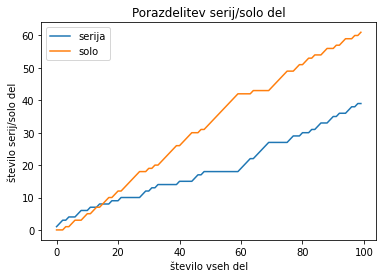

In [585]:
df2 = pd.DataFrame(tocke, columns=['serija', 'solo'])
ax = df2.plot(title='Porazdelitev serij/solo del')
ax.set_xlabel("število vseh del")
ax.set_ylabel("število serij/solo del")

Oranžen graf predstavlja samostojna dela, moder pa serije. Vidim, da med prvimi petnajstimi deli prevladujejo serije, nato pa je delež samostojnih del večji (v prejšnjih izračunih sem videla, da je razmerje samostojnih del proti serijam v prvi stoterici 6:4).<br>
Sedaj si ogledam, kako se količini spreminjata skozi celotno lestvico.

In [586]:
a_cel = stej_serije(len(knjige2))

In [587]:
b_cel = stej_solo(len(knjige2))

In [588]:
podatki_cel = [a_cel, b_cel]

In [589]:
tocke_cel = [list(x) for x in zip(*podatki_cel)] 

Text(0, 0.5, 'število serij/solo del')

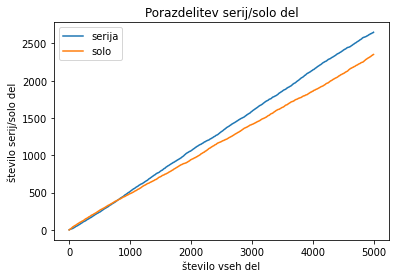

In [590]:
df2_cel = pd.DataFrame(tocke_cel, columns=['serija', 'solo'])
ax_cel = df2_cel.plot(title='Porazdelitev serij/solo del')
ax_cel.set_xlabel("število vseh del")
ax_cel.set_ylabel("število serij/solo del")

Vidim, da je delež serij in samostojnih del približno enak. Na začetku sicer rahlo prevladujejo samostojna dela, kasneje pa se tehtnica prevesi v korist serij. Zdi se torej, da samostojnost/vsebovanost v serijo, ne vpliva bistveno na splošno priljubljenost dela (med najbolj priljubljenimi deli je približno polovica serij in polovica samostojnih del).

Pogledam še, pri katerem tipu je povprečna ocena bralcev višja (ocena od 1 do 5).<br>
Opomba: Prej sem analizirala glede na score, v katerem so združeni st_reviewov, povprecna_ocena, st_glasov, st_ocen...

In [591]:
povprecna_ocena_serije = knjige[knjige.serija == True].povprecna_ocena.mean()

In [592]:
povprecna_ocena_solo = knjige[knjige.serija == False].povprecna_ocena.mean()

In [593]:
povprecna_ocena_serije

4.0981879954699885

In [594]:
povprecna_ocena_solo

4.023002977456401

Povprečna ocena serij je torej za malenkost višja, toda razlika je zanemarljiva (0,08 točke). Ocena bralcev je torej praktično ista za serije in samostojna dela.

Glede na opravljeno analizo lahko torej zaključim, da se malenkost bolj splača napisati serijo. Poleg tega imam po uspešnem prvem delu zagotovljeno bralno publiko za nadaljevanja.

# Kateri avtorji in založbe so imeli največ uspešnic?

Da dobim občutek, kakšen stil pisanja si želijo bralci, poiščem najboljše avtorje in kasneje preberem nekaj njihovih del.
Znova bom najuspešnejšega avtorja poiskala v različno velikih skupinah: 100 in 5000 knjig.

Za začetek si ogledam, kateri avtorji imajo največ del na samem vrhu lestvice in med prvimi 5000 deli na lestvici:

Iščem avtorja z največ deli med prvo stoterico:

In [595]:
st_knjig_avtorja_100 = knjige[['avtor','id_avtor']].head(100).groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [596]:
najboljsi_avtorji_100 = pd.merge(st_knjig_avtorja_100,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor')

In [597]:
najboljsi_avtorji_100.drop_duplicates(keep='last').sort_values('st_knjig',ascending=False).head(10)

,id_avtor,st_knjig,avtor
13,1077326,4,J.K. Rowling
21,569,2,Khaled Hosseini
31,656983,2,J.R.R. Tolkien
43,239579,2,Charles Dickens
51,3137322,2,Fyodor Dostoyevsky
18,3706,2,George Orwell
387,630,1,Dan Brown
432,106,1,Madeleine L&#39;Engle
428,306,1,William Golding
427,316,1,Alice Sebold


J.K.Rowling je torej napisala kar 4 izmed stotih najboljših del spletne strani, zato bi bilo smiselno preučiti njen stil in vsebino pisanja.<br>

Poiščem še najbolj uspešnega avtorja celotne lestvice (v našem primeru prvih 5000 del).

In [598]:
st_knjig_avtorja = knjige[['avtor','id_avtor']].groupby('id_avtor').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [599]:
najboljsi_avtorji = pd.merge(st_knjig_avtorja,knjige[['avtor','id_avtor']],left_on='id_avtor',right_on='id_avtor').drop_duplicates(keep='last').sort_values('st_knjig',ascending=False)

In [600]:
najboljsi_avtorji.head(30)

,id_avtor,st_knjig,avtor
51,3389,52,Stephen King
90,1654,39,Terry Pratchett
117,15872,27,Rick Riordan
139,137902,22,Richelle Mead
159,9550,20,Laurell K. Hamilton
179,1221698,20,Neil Gaiman
198,2345,19,Nicholas Sparks
217,947,19,William Shakespeare
236,10746,19,Jim Butcher
254,3780,18,James Patterson


Na prvem mestu je sedaj drug avtor in sicer Stephen King.

Preverim, katerega žanra so dela desetih najuspešnejših avtorjev (gledano na celotno lestvico).

In [601]:
tabela_avtorjev = [i for i in najboljsi_avtorji.id_avtor.head(20)]

In [602]:
dela_najboljsih_avtorjev = knjige[(knjige.id_avtor).isin(tabela_avtorjev)]

In [603]:
zanr_del_najboljsih_avtorjev = pd.merge(dela_najboljsih_avtorjev, zanri,left_on='id_knjige',right_on='id_knjige').groupby('zanr')

In [604]:
zanr_del_najboljsih_avtorjev.size().to_frame('st_knjig_zanra').sort_values('st_knjig_zanra', ascending=False).head(10)

,st_knjig_zanra
zanr,
fantasy,253
fiction,234
young-adult,106
paranormal,79
horror,67
romance,65
vampires,48
urban-fantasy,47
humor,33


Tudi na tej lestvici še vedno kraljujeta fatasy/fiction. Če je moj cilj postati pisateljica z največ knjigami na lestvici goodreads je izbira žanra fatasy/fiction naravnost vrhunska.

Sedaj želim izbrati še založbo, ki me bo popeljala med pisateljske zvezde.

Najprej poiščem založbo, ki je založila največ knjig na lestvici.

In [605]:
st_knjig_zalozbe = knjige[knjige.zalozba != "unknown"][['zalozba']].groupby('zalozba').size().to_frame('st_knjig').sort_values('st_knjig', ascending=False)

In [606]:
st_knjig_zalozbe.head(10)

,st_knjig
zalozba,
Vintage,135
Penguin Books,92
Ballantine Books,72
HarperTeen,65
Penguin Classics,65
HarperCollins,63
St. Martin's Press,51
"Little, Brown and Company",47
"Little, Brown Books for Young Readers",47


Želim poiskati tudi najuspešnejšo založbo po nagrajenosti njenih založenih del.

In [607]:
nagrajene_knjige = knjige[knjige.nagrade == True]

Za začetek si ogledam, katera založba ima največ del, ki so prejela vsaj eno nagrado.

In [608]:
st_nagrajenih_knjig_zalozbe = nagrajene_knjige.groupby('zalozba').size().to_frame('st_nagrajenih_del').sort_values('st_nagrajenih_del', ascending=False).head(15)

In [609]:
st_nagrajenih_knjig_zalozbe

,st_nagrajenih_del
zalozba,
Vintage,83
Penguin Books,44
Ballantine Books,38
Random House,35
"Little, Brown Books for Young Readers",34
Tor Books,32
HarperCollins,32
"Little, Brown and Company",31
St. Martin's Press,30


Poiščem še najbolj uspešno založbo po številu nagrad.

In [610]:
pd.merge(nagrajene_knjige, nagrade,left_on='id_knjige',right_on='id_knjige').groupby('zalozba').size().to_frame('st_nagrad').sort_values('st_nagrad', ascending=False).head(10)

,st_nagrad
zalozba,
Vintage,217
"Little, Brown and Company",155
Random House,145
"Little, Brown Books for Young Readers",130
Alfred A. Knopf,125
Scholastic Press,125
HarperCollins,115
Penguin Books,111
Tor Books,101


Založba Vintage je torej založila največ del z lestvice, ima največ del, ki so prejela vsaj eno nagrado in je skupno prejela največ nagrad, zato se zdi dobra izbira za mojo založbo.

Kot sem že omenila: lepo bi bilo osvojiti vsaj eno nagrado. Zato si za pisateljski zgled poiščem avtorje z največ nagrajenimi deli.

In [611]:
nagrajeni_avtorji = nagrajene_knjige.groupby('id_avtor').size().to_frame('st_nagrajenih_del').sort_values('st_nagrajenih_del', ascending=False).head(10)

In [612]:
najbolj_nagrajeni_avtorji = pd.merge(nagrajeni_avtorji, knjige[['id_avtor','avtor']],left_on='id_avtor',right_on='id_avtor').drop_duplicates(keep='last')

In [613]:
najbolj_nagrajeni_avtorji

,id_avtor,st_nagrajenih_del,avtor
51,3389,39,Stephen King
90,1654,22,Terry Pratchett
117,15872,15,Rick Riordan
137,1221698,13,Neil Gaiman
151,1077326,12,J.K. Rowling
164,3433047,12,Sarah J. Maas
181,150038,12,Cassandra Clare
197,20248,12,J.R. Ward
219,137902,11,Richelle Mead
235,3354,10,Haruki Murakami


Ugotoviti želim še, v katerem žanru ustvarjajo ti pisatelji.

In [614]:
sez_naj_nagrajenih_avtorjev = [i for i in najbolj_nagrajeni_avtorji.id_avtor]

In [615]:
dela_naj_nagrajenih_avtorjev = knjige[(knjige.id_avtor).isin(sez_naj_nagrajenih_avtorjev)]

In [616]:
zanr_del_naj_nagrajenih_avtorjev = pd.merge(dela_naj_nagrajenih_avtorjev, zanri,left_on='id_knjige',right_on='id_knjige').groupby('zanr')

In [617]:
zanr_del_naj_nagrajenih_avtorjev.size().to_frame('st_knjig_zanra').sort_values('st_knjig_zanra', ascending=False).head(10)

,st_knjig_zanra
zanr,
fantasy,173
fiction,132
young-adult,88
horror,52
romance,35
humor,33
paranormal,31
mythology,27
vampires,23


Tudi pri najbolj nagrajenih avtorjih (po številu nagrajenih del) prevladujejo zvrst fantasy/fiction.

# Ali obstaja časovno obdobje, v katerem je izšla večina del iz vrha lestvice?


Pri pisanju želim ugotoviti ali dela iz nekega obdobja na lestvici izstopajo, ker tako lahko preučim, v čem se dela tistega obdobja razlikujejo od trenutnih in kaj jih dela boljše.

Za začetek si ogledam, iz katerega desetletja so dela na samem vrhu.

In [618]:
knjige_z_letom_100 = knjige[knjige.leto != "unknown"].head(100)

In [619]:
desetletje_100= (pd.to_numeric(knjige_z_letom_100.leto).to_frame('desetletje')//10)*10

In [620]:
knjige_desetletje_100 = pd.merge(knjige_z_letom_100[['id_avtor','serija','povprecna_ocena','nagrade']],desetletje_100,left_on='id_knjige',right_on='id_knjige')

Text(0, 0.5, 'število del')

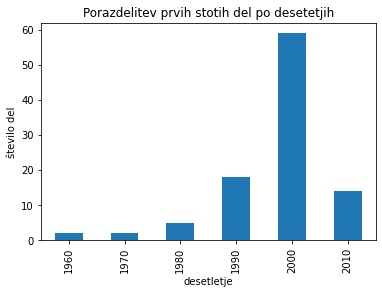

In [621]:
graf_desetletje_100 = knjige_desetletje_100.groupby('desetletje').size().plot.bar(title="Porazdelitev prvih stotih del po desetetjih")
graf_desetletje_100.set_ylabel("število del")

Najboljših sto del je torej v veliki večini izšlo med letoma 2000 in 2010.

Ogledam si še razporeditev po desetletjih za vsa dela.

In [622]:
knjige_z_letom = knjige[knjige.leto != "unknown"]

In [623]:
desetletje= (pd.to_numeric(knjige_z_letom.leto).to_frame('desetletje')//10)*10

In [624]:
knjige_desetletje = pd.merge(knjige_z_letom[['id_avtor','serija','povprecna_ocena','nagrade']],desetletje,left_on='id_knjige',right_on='id_knjige')

Text(0, 0.5, 'število del')

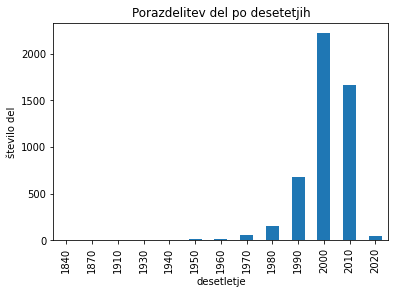

In [625]:
graf_desetletje = knjige_desetletje.groupby('desetletje').size().plot.bar(title="Porazdelitev del po desetetjih")
graf_desetletje.set_ylabel("število del")

Večina del z vrha lestvice je izšla med letoma 2000 in 2020.

# Ali so knjige z literarnimi nagradami tudi med bralci bolje ocenjene?
Želim preveriti ali bralci knjigam z literarnimi nagradami v povprečju dajo višjo oceno, kot tistim brez nagrad.<br>
Želim tudi preveriti, ali povprečna ocena s številom nagrad narašča.

Za začetek pogledam ali je med deli več takih z nagradami ali brez.

In [626]:
knjige.groupby('nagrade').size()

nagrade
False    2591
True     2409
dtype: int64

Slaba polovica del je torej prejela vsaj eno nagrado.

Sedaj preučim povprečno oceno nagrajenih in nenagrajenih del.

In [627]:
povprecna_ocena_z_nagrado = knjige[knjige.nagrade == True].povprecna_ocena.mean()

In [628]:
povprecna_ocena_z_nagrado

4.0491407222914075

In [629]:
povprecna_ocena_brez_nagrade = knjige[knjige.nagrade == False].povprecna_ocena.mean()

In [630]:
povprecna_ocena_brez_nagrade

4.075569278270938

Vidim, da je ocena praktično enaka za dela z nagradami in tista brez njih.

Ogledam si še ali se ocena nagrajenih del spreminja s številom nagrad.

In [631]:
nagrajene_knjige = knjige[knjige.nagrade == True]

In [632]:
nagrajene_knjige

,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade
id_knjige,,,,,,,,,,,,,
1,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True
2,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True
3,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True
5,Twilight,Stephenie Meyer,941441,True,About three things I was absolutely positive. ...,2006,"Little, Brown and Company",3.61,1472928,15012,5135962,106204,True
6,The Book Thief,Markus Zusak,11466,False,It is 1939. Nazi Germany. The country is hol...,2006,Alfred A. Knopf,4.38,1407928,14526,1909675,115407,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,"Zero to One: Notes on Startups, or How to Buil...",Peter Thiel,8474721,False,"If you want to build a better future, you must...",2014,Crown Business,4.17,610,7,208564,6216,True
4986,An American Marriage,Tayari Jones,292970,False,"Newlyweds, Celestial and Roy, are the embodime...",2018,Algonquin Books,3.96,610,7,278310,23846,True
4988,The Last Guardian,Eoin Colfer,10896,True,It's Armageddon Time for Artemis Fowl Opal Ko...,2012,Disney/Hyperion Books,4.15,609,7,52204,2465,True


In [633]:
ocena_in_nagrade = pd.merge(nagrajene_knjige[['povprecna_ocena']],nagrade, left_on='id_knjige', right_on='id_knjige')

In [634]:
knjige['st_nagrad']=ocena_in_nagrade.groupby('id_knjige').size().to_frame('st_nagrad')

In [635]:
ocena_z_nagradami = knjige.groupby('st_nagrad').povprecna_ocena.mean()

Text(0, 0.5, 'povprečna ocena')

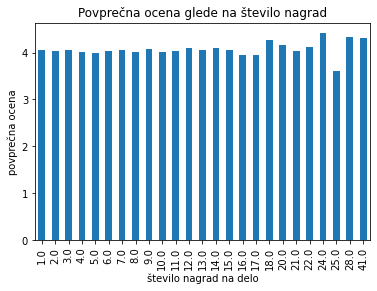

In [636]:
graf_ocene_z_nagradami = ocena_z_nagradami.plot.bar(title="Povprečna ocena glede na število nagrad")
graf_ocene_z_nagradami.set_xlabel("število nagrad na delo")
graf_ocene_z_nagradami.set_ylabel("povprečna ocena")

In [637]:
len(knjige[knjige.st_nagrad >= 18])

15

Ocena bralcev se pri zelo nagrajenih delih (okoli 20 nagrad) rahlo zviša, edina izjema so knjige s petindvajsetimi nagradami.
Vendar pa je del z več kot sedemnajstimi nagradami (tam ocena začne naraščati) le 15, zato nimam dovolj podatkov, da bi napovedala ali bo povprečna ocena zelo nagrajenih del tudi na splošno višja/nižja ali pa sem le dobila en dobro/slabo ocenjen primer (npr. Imam delo s tridesetimi nagradami, ki je tudi edino delo s toliko nagradami, ki pa bralcem ni pretirano všeč. Iz povprečne ocene bi tako delovalo, da so dela s tridesetimi nagradami obupno ocenjena, kar pa ni nujno res).<br>

Na podlagi analize ugotovim, da število nagrad in nagrajenost v splošnem ne vplivata na oceno bralcev.

# Priporoči mi knjigo

Da pridobim nekaj pisateljskega občutka, se odločim prebrati nekaj boljših del.<br>
Želim prebrati dela, ki ustrezajo tipu knjige, ki jo želim napisati.

Definiram funkcijo, ki mi sporoči, kakšno delo moram napisati glede na lestvico goodreads.

In [638]:
def priporoci_knjigo_glede_na_podatke():
    najuspešnejši_zanri = priljubljeni_zanri.head(5).index.tolist()
    serija_ali_solo = (knjige.groupby('serija').size().to_frame('je_serija').sort_values('je_serija')[::-1]).index.tolist()[0]
    avtorji_zgled = []
    df = pd.merge(zanri[zanri.zanr.isin(najuspešnejši_zanri)], knjige, left_on='id_knjige', right_on='id_knjige').head(30)["avtor"].tolist()
    for i in df:
        if not (i in avtorji_zgled):
            avtorji_zgled.append(i)
    avtorji_zgled = avtorji_zgled[:10]
    print("Za žanr izberi enega od :{}".format(najuspešnejši_zanri))
    if serija_ali_solo == True:
        print("Napiši serijo")
    else:
        print("Napiši individualno delo")
    print("Zgleduj se po: {}".format(avtorji_zgled))

In [639]:
priporoci_knjigo_glede_na_podatke()

Za žanr izberi enega od :['fiction', 'fantasy', 'young-adult', 'classics', 'romance']
Napiši serijo
Zgleduj se po: ['Suzanne Collins', 'J.K. Rowling', 'Harper Lee', 'Jane Austen', 'Stephenie Meyer', 'Markus Zusak', 'George Orwell', 'C.S. Lewis', 'J.R.R. Tolkien', 'John Green']


Po katerem avtorju se bom zgledovala, je seveda odvisno od izbire žanra.<br>
Zato definiram še funkcijo, ki mi ob izbranem žanru in seriji/samostojnem delu ter minimalni oceni priporoči knjigo v branje.<br>
Funkcijo seveda lahko uporabim tudi za iskanje novega bralnega gradiva.

In [640]:
def priporoci_knjigo(zanr,serija,ocena):
    pravilni_zanri = zanri[zanri.zanr==zanr]
    ustrezna_serija = knjige[knjige.serija == serija]
    ustrezna_ocena = ustrezna_serija[knjige.povprecna_ocena >= ocena]
    return pd.merge(pravilni_zanri, ustrezna_ocena,left_on='id_knjige', right_on='id_knjige').head(10)

In [641]:
priporoci_knjigo("fiction",True,4).head(10)

<ipython-input-640-b7963f63a38a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ustrezna_ocena = ustrezna_serija[knjige.povprecna_ocena >= ocena]


,zanr,knjiga,avtor,id_avtor,serija,opis,leto,zalozba,povprecna_ocena,score,st_glasov,st_ocen,st_reviewov,nagrade,st_nagrad
id_knjige,,,,,,,,,,,,,,,
1,fiction,The Hunger Games,Suzanne Collins,153394,True,"Could you survive on your own in the wild, wit...",2008,Scholastic Press,4.32,3038720,30970,6595031,174357,True,41.0
2,fiction,Harry Potter and the Order of the Phoenix,J.K. Rowling,1077326,True,There is a door at the end of a silent corrido...,2004,Scholastic Inc.,4.50,2668003,27286,2610721,44305,True,9.0
3,fiction,To Kill a Mockingbird,Harper Lee,1825,True,The unforgettable novel of a childhood in a sl...,2006,Harper Perennial Modern Classics,4.28,2311193,23750,4677256,93734,True,4.0
8,fiction,The Chronicles of Narnia,C.S. Lewis,1069006,True,"Journeys to the end of the world, fantastic cr...",2002,HarperCollins,4.26,1256688,13134,538495,10595,False,NaN
9,fiction,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,656983,True,"This four-volume, boxed set contains J.R.R. To...",2012,Ballantine Books,4.60,1185041,12366,113292,1832,False,NaN
12,fiction,The Hitchhiker's Guide to the Galaxy,Douglas Adams,4,True,Seconds before the Earth is demolished to make...,2007,Del Rey,4.22,1075365,11115,1490038,31357,False,NaN
19,fiction,Alice's Adventures in Wonderland / Through the...,Lewis Carroll,8164,True,"I can't explain myself, I'm afraid, sir, said ...",2000,Penguin Group (USA),4.06,845404,8932,473751,10992,False,NaN
22,fiction,Divergent,Veronica Roth,4039811,True,"In Beatrice Prior's dystopian Chicago world, s...",2012,Katherine Tegen Books,4.19,806084,8471,3020645,109171,True,20.0
30,fiction,Harry Potter and the Sorcerer's Stone,J.K. Rowling,1077326,True,Harry Potter's life is miserable. His parents ...,2003,Scholastic Inc,4.48,730630,7754,7370404,116815,True,28.0


S tem je moja analiza končana, se vidimo junija 2021 na podelitvi Kresnika.